# Frequency processing

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Sine Images

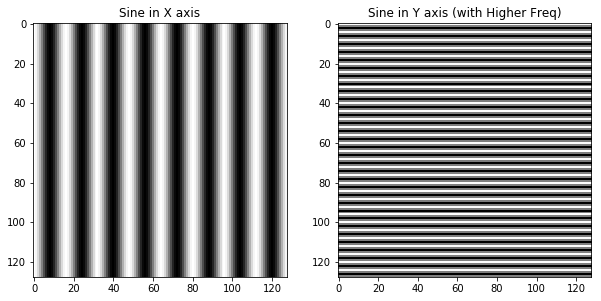

In [2]:
I1 = cv.imread('../imgs/sinex.png', 0)
I2 = cv.imread('../imgs/siney.png', 0)

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(I1, cmap='gray'),plt.title('Sine in X axis')
plt.subplot(122),plt.imshow(I2, cmap='gray'),plt.title('Sine in Y axis (with Higher Freq)');

Now, we're going to visualize the frequency representation of the previous sine image:

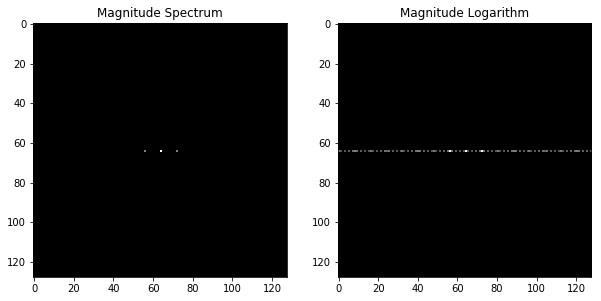

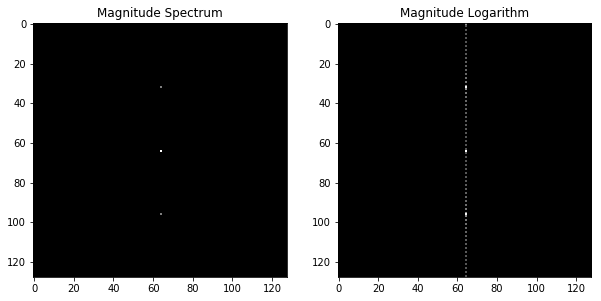

In [3]:
F = np.fft.fft2(I1)
F = np.fft.fftshift(F)
F_Mag = np.abs(F)
F_MagLog = 20*np.log10(np.abs(F+1))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(F_Mag, cmap='gray'),plt.title('Magnitude Spectrum')
plt.subplot(122),plt.imshow(F_MagLog, cmap='gray'),plt.title('Magnitude Logarithm');

#######################################
F = np.fft.fft2(I2)
F = np.fft.fftshift(F)
F_Mag = np.abs(F)
F_MagLog = 20*np.log10(np.abs(F+1))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(F_Mag, cmap='gray'),plt.title('Magnitude Spectrum')
plt.subplot(122),plt.imshow(F_MagLog, cmap='gray'),plt.title('Magnitude Logarithm');

# Square Images

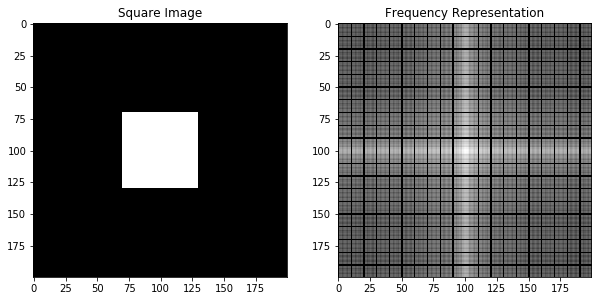

In [4]:
I = np.zeros((200,200),np.uint8)
wsx = 30
I[100-wsx:100+wsx,100-wsx:100+wsx] = 255

F = np.fft.fft2(I)
F = np.fft.fftshift(F)
F_MagLog = 20*np.log10(np.abs(F+1))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(I, cmap='gray'),plt.title('Square Image')
plt.subplot(122),plt.imshow(F_MagLog, cmap='gray'),plt.title('Frequency Representation');

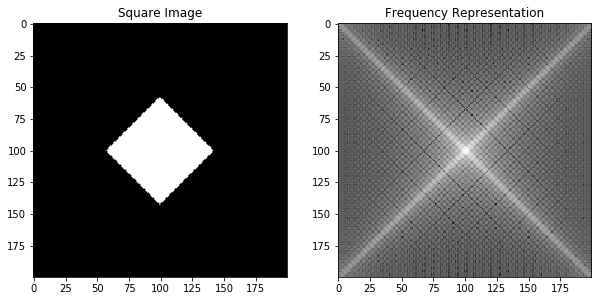

In [5]:
rows,cols = I.shape
angle = 45
M = cv.getRotationMatrix2D((cols/2,rows/2),angle,1)
Ir = cv.warpAffine(I,M,(cols,rows))

F = np.fft.fft2(Ir)
F = np.fft.fftshift(F)
F_MagLog = 20*np.log10(np.abs(F+1))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(Ir, cmap='gray'),plt.title('Square Image')
plt.subplot(122),plt.imshow(F_MagLog, cmap='gray'),plt.title('Frequency Representation');

## Frequency Filtering

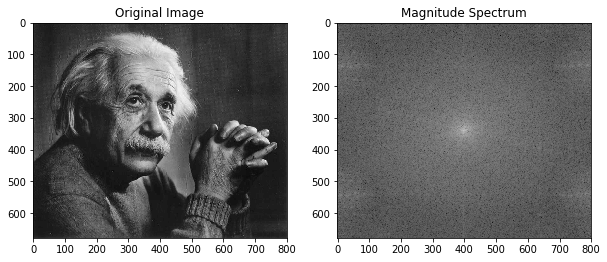

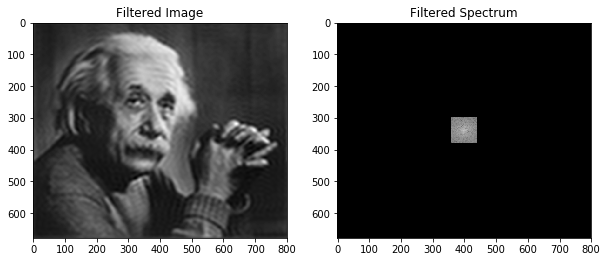

In [6]:
I = cv.imread('../imgs/einstein.tif',0) 

rows,cols = I.shape
crow,ccol = np.int(rows/2), np.int(cols/2)
# create a mask first, center square is 1, remaining all zeros
sq = 40
mask = np.zeros((rows,cols),np.uint8)
mask[crow-sq:crow+sq, ccol-sq:ccol+sq] = 1

F = np.fft.fft2(I)
F = np.fft.fftshift(F)
Ffilt = F*mask
Ffilt_shift = np.fft.ifftshift(Ffilt)
Ifilt = np.abs(np.fft.ifft2(Ffilt_shift))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(I, cmap='gray'),plt.title('Original Image')
plt.subplot(122),plt.imshow(20*np.log10(np.abs(F+1)), cmap='gray'),plt.title('Magnitude Spectrum')

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(Ifilt, cmap='gray'),plt.title('Filtered Image')
plt.subplot(122),plt.imshow(20*np.log10(np.abs(Ffilt+1)), cmap='gray'),plt.title('Filtered Spectrum');

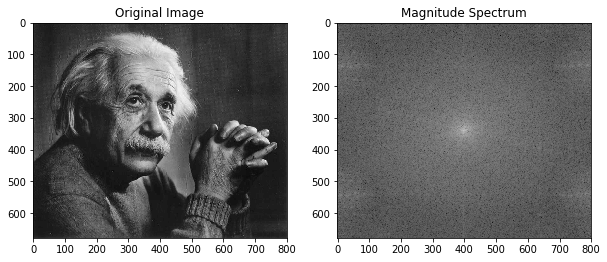

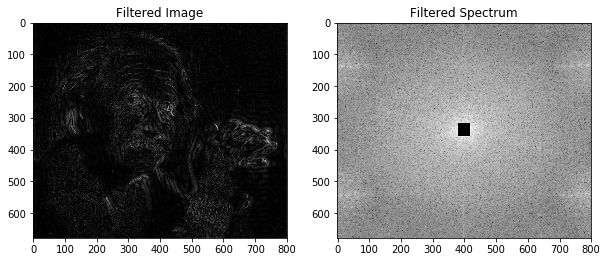

In [7]:
I = cv.imread('../imgs/einstein.tif',0) 

rows,cols = I.shape
crow,ccol = np.int(rows/2), np.int(cols/2)
# create a mask first, center square is 1, remaining all zeros
sq = 20
mask = np.ones((rows,cols),np.uint8)
mask[crow-sq:crow+sq, ccol-sq:ccol+sq] = 0

F = np.fft.fft2(I)
F = np.fft.fftshift(F)
Ffilt = F*mask
Ffilt_shift = np.fft.ifftshift(Ffilt)
Ifilt = np.abs(np.fft.ifft2(Ffilt_shift))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(I, cmap='gray'),plt.title('Original Image')
plt.subplot(122),plt.imshow(20*np.log10(np.abs(F+1)), cmap='gray'),plt.title('Magnitude Spectrum')

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(Ifilt, cmap='gray'),plt.title('Filtered Image')
plt.subplot(122),plt.imshow(20*np.log10(np.abs(Ffilt+1)), cmap='gray'),plt.title('Filtered Spectrum');

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">